# TP Decision Tree : Regression   +Train-Test-Validation

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
#%matplotlib inline  
plt.ion()
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

### Regression

In [2]:
np.random.seed(42) # Set the random seed

def groundTruth(x):
    return np.tanh(x)

# Create a noisy tanh dataset
def regression_data(Ntrain, noiseType='every5', noiseStrength=1.0):
    ## the X locations where data is available are taken at random, uniformly
    X = np.sort(6 * np.random.rand(Ntrain) - 3, axis=0) ## Ntrain lines, 1 column // amplitude 6, average 0
    
    ## the data  to predict is y=tanh(X)+noise
    y = np.tanh(X)
    if noiseType == 'every5':
        ## noise "some observations are very noisy, some are perfect"
        y[::5] += noiseStrength * (0.5 - np.random.rand(Ntrain//5)) # add noise once every 5 entry
    elif noiseType == 'everywhere':
        ## more intersting noise: all observations have a bit of noise ##
        y += noiseStrength * (0.5 - np.random.rand(Ntrain)) ## uniform distrib of width  [noiseType]
    
    X_test_GroundTruth = np.arange(-3.0, 3.0, 0.05)[:, np.newaxis]
    y_test_GroundTruth = groundTruth(X_test_GroundTruth) # np.tanh(X_test_GroundTruth).ravel()
    return X,y,X_test_GroundTruth,y_test_GroundTruth


In [3]:
noiseType='every5'
noiseType='everywhere'
noiseStrength=1.0

Ntrain = 400
X,y, X_test_GroundTruth,y_test_GroundTruth = regression_data(Ntrain, noiseType, noiseStrength)
Ntest = 200
Xtest,ytest, trash,trash = regression_data(Ntest, noiseType, noiseStrength)
Nvalidation = 200
Xvali,yvali, trash, trash = regression_data(Nvalidation, noiseType, noiseStrength)

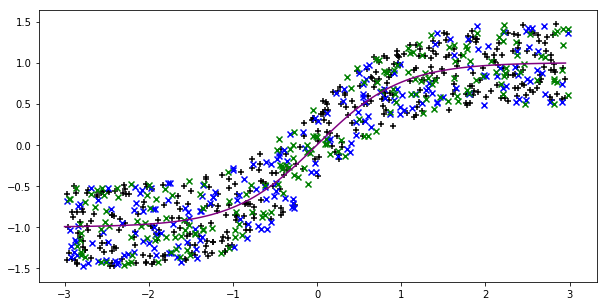

In [4]:
plt.figure(1,[10,5])
plt.scatter(X, y, marker='+', c="black")
plt.scatter(Xtest, ytest, marker='x', c="blue")
plt.scatter(Xvali, yvali, marker='x', c="green")
# plt.show()
# plt.figure(1,[10,5])
plt.plot(X_test_GroundTruth, y_test_GroundTruth, ls='-', c="purple")

#### Regression error: 

In [5]:
## we can define various error functions
def error_regression_MSE(y_pred, y_true):
    return np.linalg.norm(y_pred - y_true) / len(y_pred)

def error_regression_MAE(y_pred, y_true):
    return np.mean(np.absolute(y_pred - y_true))

### Decision Tree
http://scikit-learn.org/stable/modules/tree.html
- Train a DecisionTreeRegressor on the data set. ( http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html# )
- evaluate the training error
- evaluate the test error
- what happenned ? what went wrong ?

In [6]:
from sklearn import tree

### Solve the problem:
- In a loop, vary the hyper-parameter 'max_depth' and display predictions. (Ideally, the whole data presented in a separate figure, each time)
- On a single figure, plot the train error and the test error (as function of max_depth)

### Step 2
- Find the best value for 'max_depth' 

###  Step 3
- Measure the true performance of this model

### Exercise: re-run everything, changing:
- shift to the other kind of noise
- play with sample numbers
- play with noise amplitude

In [7]:
# you can do this by just changing values in the first cells and re-run everything (Kernel-> Restart&Run all)

## BONUS: another kind of regression

###(note how much this model tends to overfits less)

In [8]:
## isotonic regression (for monotonically increasing functions)
from sklearn.isotonic import IsotonicRegression
iso_reg = IsotonicRegression().fit(X, y)